### Lab 4: Iterative learning - solutions

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### 1 - How long does it take to train an OLS model?

- Create a random simulated feature set X with 100 rows and 20 columns
- Create a random simulated label vector y with 100 rows
- Train a LinearRegression() model - how long does it take?
- Increase the number of feature columns to 200
- Increase the number of rows to 1 Million
- Now how long does it take to train the model?

In [2]:
#X = np.random.normal(size = ?)
#y = np.random.normal(size = ?)


X = np.random.normal(size = (100, 20))
y = np.random.normal(size = 100)
lm = LinearRegression()
lm.fit(X, y)
# this only takes a moment

LinearRegression()

In [3]:
X = np.random.normal(size = (1000000, 200))
y = np.random.normal(size = 1000000)
lm = LinearRegression()
lm.fit(X, y)
# this takes more than 15 seconds

LinearRegression()

#### 2 - Boston Housing: multivariate linear regression

1. Build a feature array and a label array from the data in "Boston_Housing.csv". Use the 'MEDV' column as the label and all other columns except 'MEDV' as features
2. Split the dataset into training and testing parts with trainig_size = 0.7
3. __Optional:__ Compute OLS model coefficients by explicitly solving the normal equation:
    - $C = (X^TX)^{-1}X^Ty$ where _C_ is an array of model coefficients $C = [c_0, c_1, ..., c_N]$
    - Reminder: use __np.matmul()__ for multiplying matrices rather the multiplication operartor *
    - __Important:__ you will need to manually add a column of ones ([1,....,1]) to the feature set X. This will let the equation compute the intercept! (_scikit-learn algorithms for OLS and SGD do this as well "under the hood"_)
4. Compute OLS model coefficients using LinearRegression(). Compare model intercept and coefficients with the result of the previous step where you calculate the coefficients explicitly
5. Compute OLS MSE on the training and test sets
6. Compute SGD model parameters on the training set and MSE for the trainng and test set. Compare SGD and OLS model performance
7. Implement data transformations required to improve the SGD model 
8.__Challenge: understanding learning as an iterative process.__ Plot MSE vs number of iterations (from 1 to 100) for the Training and Test sets
    - Set Learning Rate to 0.005 
    - Comment on the difference between MSE_train and MSE_test. How does MSE_test evolve with number of iterations?   
    - What is the optimal number of iterations?

In [4]:
#1
df = pd.read_csv('https://github.com/wsko/data_science_academy/raw/main/data/Boston_Housing.csv')
y = df['MEDV'].values
feature_names = list(df.columns[:-1])
X_ = df[feature_names].values

In [5]:
#2
X_train, X_test, y_train, y_test = train_test_split(X_, y, train_size=0.7, random_state=15)

In [6]:
#3
## Optional: solve the normal equation
## Note: use np.matmul() for multiplying matrices

# add an array of ones as the first column of you feature array. hint: np.hstack
X_train_1 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# compute the coefficients: note the first coefficient is the intercept
np.matmul((np.linalg.inv(np.matmul(X_train_1.T,X_train_1))),np.matmul(X_train_1.T,y_train))


array([ 4.78344612e+01, -1.04327060e-01,  6.76326749e-02,  7.56931720e-02,
        2.26084696e+00, -2.37518228e+01,  3.00299910e+00,  2.44073264e-02,
       -1.60843549e+00,  3.38521572e-01, -1.43760775e-02, -9.42402926e-01,
       -6.29261945e-01])

In [7]:
#4
ols = LinearRegression()
ols.fit(X_train, y_train)
(ols.intercept_, ols.coef_)

(47.83446117281893,
 array([-1.04327060e-01,  6.76326749e-02,  7.56931720e-02,  2.26084696e+00,
        -2.37518228e+01,  3.00299910e+00,  2.44073264e-02, -1.60843549e+00,
         3.38521572e-01, -1.43760775e-02, -9.42402926e-01, -6.29261945e-01]))

In [8]:
#5
print("train mse:  ", mean_squared_error(y_train, ols.predict(X_train)))
print("test mse:  ", mean_squared_error(y_test, ols.predict(X_test)))

train mse:   20.71718490982229
test mse:   27.80079842311241


In [9]:
#6
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("SGD model parameters:", "\n", sgd.intercept_, "\n", sgd.coef_, "\n")
print("train mse:  ", mean_squared_error(y_train, sgd.predict(X_train)))
print("test mse:  ", mean_squared_error(y_test, sgd.predict(X_test)))

SGD model parameters: 
 [-1.47403688e+10] 
 [ 2.68942805e+11 -1.01238990e+11  5.35505001e+11 -6.78003633e+09
 -1.79105227e+10 -1.51812478e+11 -9.24456879e+10  1.45721240e+11
  2.48878792e+11  3.68707706e+11  9.96982020e+10 -2.55960241e+09] 

train mse:   2.845355138708005e+28
test mse:   2.758326526018562e+28


In [10]:
#7
## Since SGD is sensitive to feature scales, we need to scale data using normalization
## Remember to use the mean and std computed on the training set for scaling both sets

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

ols = LinearRegression()
ols.fit(X_train_sc, y_train)
print("OLS model parameters:", "\n", ols.intercept_, "\n", ols.coef_, "\n")
print("train mse:  ", mean_squared_error(y_train, ols.predict(X_train_sc)))
print("test mse:  ", mean_squared_error(y_test, ols.predict(X_test_sc)))
print("=======================================================")
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train_sc, y_train)
print("SGD model parameters:", "\n", sgd.intercept_, "\n", sgd.coef_, "\n")
print("train mse:  ", mean_squared_error(y_train, sgd.predict(X_train_sc)))
print("test mse:  ", mean_squared_error(y_test, sgd.predict(X_test_sc)))

OLS model parameters: 
 22.59887005649722 
 [-0.82034362  1.56262542  0.51894519  0.53407183 -2.73243312  2.13268426
  0.68767209 -3.27447668  2.94409421 -2.44405727 -2.05013295 -4.48267713] 

train mse:   20.71718490982229
test mse:   27.80079842311226
SGD model parameters: 
 [22.60845312] 
 [-0.70317329  1.38850842 -0.010479    0.57820019 -2.38243694  2.31471066
  0.5602226  -3.08659096  1.85577149 -1.26844771 -1.94874865 -4.43496686] 

train mse:   20.922213529466866
test mse:   27.105269504726266


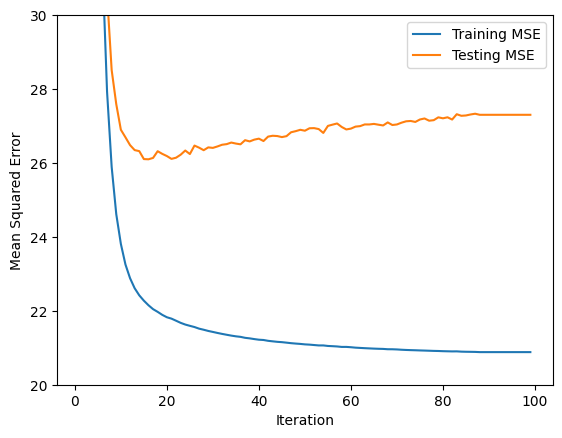

In [11]:
#8
MSE_train = []
MSE_test = []
for i in range(1,100):
    sgd = SGDRegressor(random_state=42, eta0 = 0.005, max_iter = i)
    sgd.fit(X_train_sc, y_train)
    MSE_train.append(mean_squared_error(y_train, sgd.predict(X_train_sc)))
    MSE_test.append(mean_squared_error(y_test, sgd.predict(X_test_sc)))

ax = sns.lineplot(x = np.arange(1,100), y = MSE_train, label = "Training MSE")
ax = sns.lineplot(x = np.arange(1,100), y = MSE_test, label = "Testing MSE")
ax.set_ylim((20, 30))
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Iteration')
plt.show()

In [12]:
#MSE_train

In [13]:
## Bonus: use "verbose" argument

sgd = SGDRegressor(random_state=42, eta0 = 0.005, verbose = True, max_iter=10)
sgd.fit(X_train_sc, y_train)

-- Epoch 1
Norm: 3.18, NNZs: 12, Bias: 9.498730, T: 354, Avg. loss: 168.995109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.92, NNZs: 12, Bias: 13.589386, T: 708, Avg. loss: 75.927661
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.42, NNZs: 12, Bias: 16.092352, T: 1062, Avg. loss: 43.621650
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.69, NNZs: 12, Bias: 17.778014, T: 1416, Avg. loss: 28.881787
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.96, NNZs: 12, Bias: 18.963917, T: 1770, Avg. loss: 21.314130
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.12, NNZs: 12, Bias: 19.824931, T: 2124, Avg. loss: 17.210699
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.27, NNZs: 12, Bias: 20.450984, T: 2478, Avg. loss: 14.908885
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.44, NNZs: 12, Bias: 20.922580, T: 2832, Avg. loss: 13.534685
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.52, NNZs: 12, Bias: 21.275580, T: 3186, Avg. loss: 12.750845
To

SGDRegressor(eta0=0.005, max_iter=10, random_state=42, verbose=True)